In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


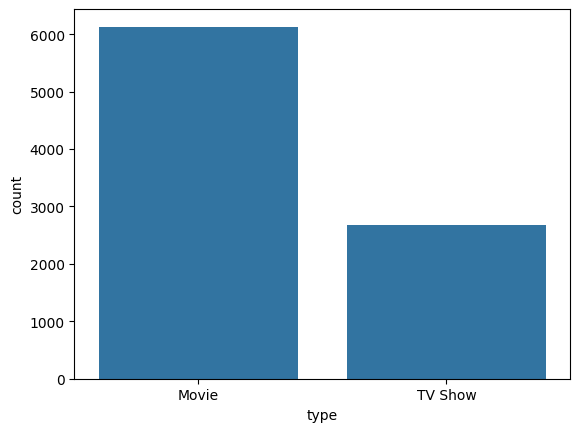

In [ ]:
sns.countplot(x='type', data=df)
plt.show()

In [ ]:
df['country']= df['country'].fillna('Unknown')


Create a list of all countries across all rows

In [ ]:
all_country = df['country'].str.split(', ').explode()


Get the Top 10 countries

In [ ]:
top_10_country = all_country.value_counts().head(10)

<Axes: ylabel='country'>

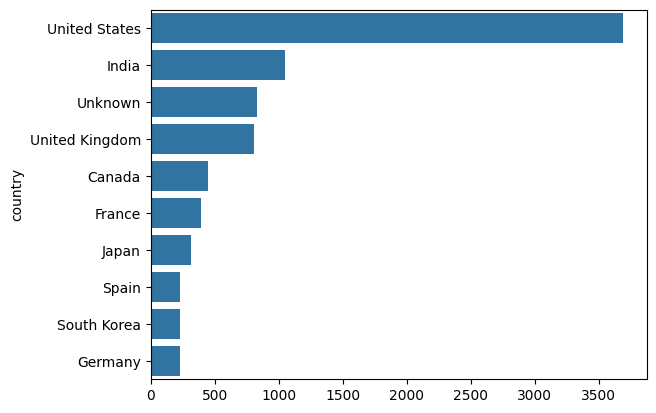

In [ ]:
sns.barplot(x= top_10_country.values, y= top_10_country.index )

Content growth per year

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
growth_year= df[df['year_added']>=2008]

In [ ]:
content_growth = growth_year.groupby(['year_added','type']).size().unstack().fillna(0)

<Axes: xlabel='year_added'>

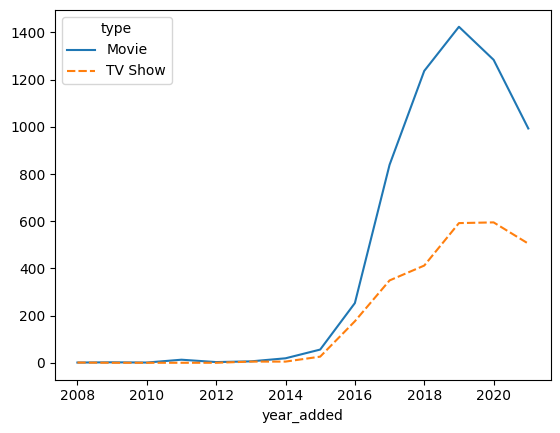

In [ ]:
sns.lineplot(data=content_growth)

Which year had most releases?

In [ ]:
peak_re_year= df.groupby('year_added').size()

<Axes: xlabel='year_added'>

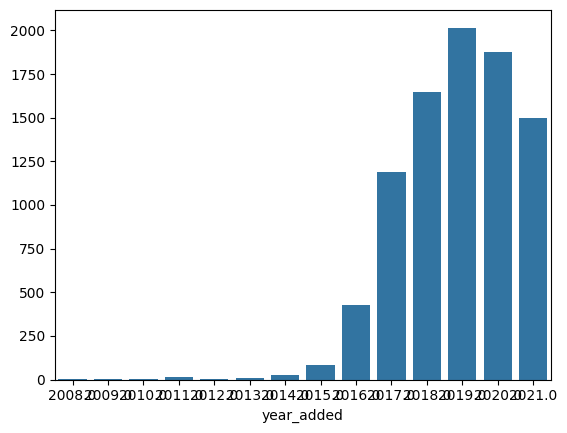

In [ ]:
sns.barplot(peak_re_year)

In [ ]:
peak_release_year = df['release_year'].value_counts().idxmax()
peak_release_count = df['release_year'].value_counts().max()

In [ ]:
peak_added_year = df['year_added'].value_counts().idxmax()
peak_added_count = df['year_added'].value_counts().max()

In [ ]:
print(f"The year with the most productions released is: {int(peak_release_year)} ({peak_release_count} titles)")
print(f"The year Netflix added the most content is: {int(peak_added_year)} ({int(peak_added_count)} titles)")

The year with the most productions released is: 2018 (1147 titles)
The year Netflix added the most content is: 2019 (2016 titles)


/tmp/ipython-input-458113900.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')


<Axes: ylabel='rating'>

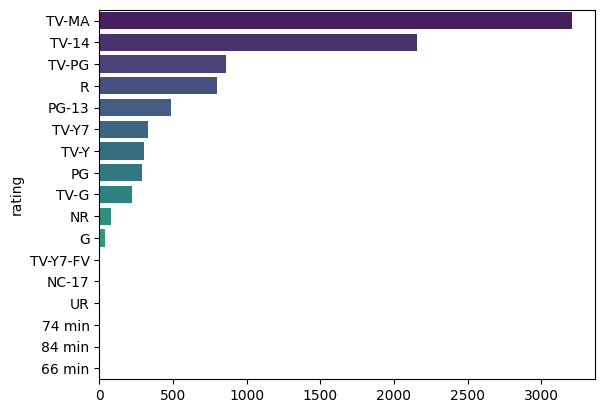

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# 1. Get the count of each rating
rating_counts = df['rating'].value_counts()

# 2. Plot the data
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')



/tmp/ipython-input-2006859446.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')


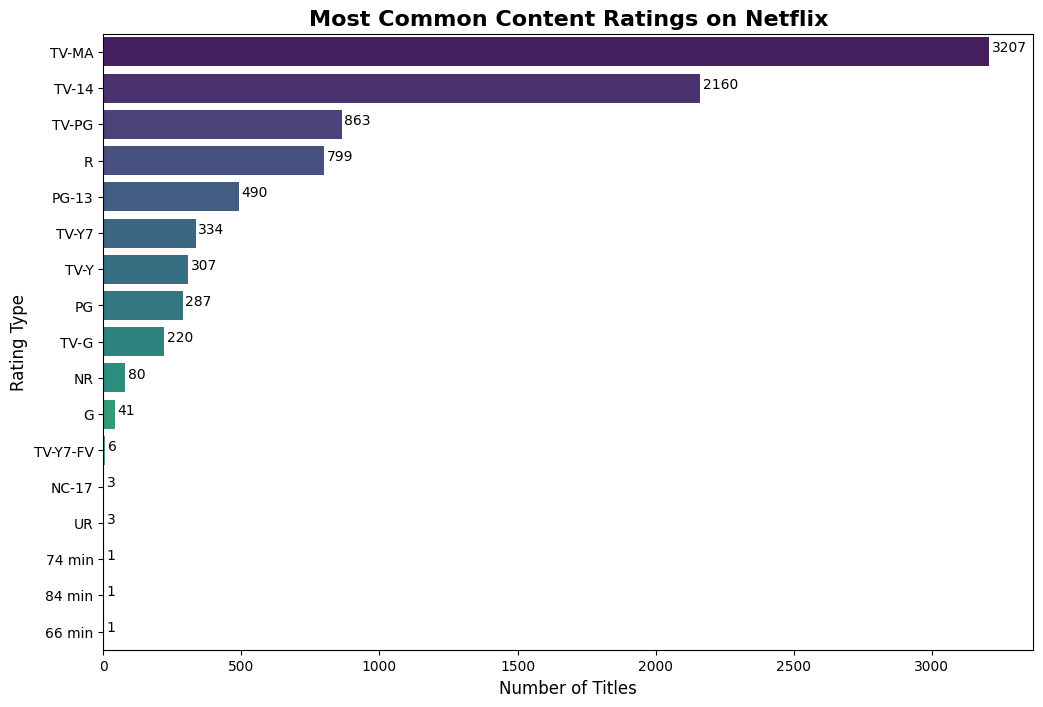

In [ ]:
          import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# 1. Get the count of each rating
rating_counts = df['rating'].value_counts()

# 2. Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')

plt.title('Most Common Content Ratings on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Rating Type', fontsize=12)

# Add data labels to each bar
for i, v in enumerate(rating_counts.values):
    plt.text(v + 10, i, str(v))

plt.show()

Which country produces most content?


In [ ]:
# 1. Cleaning the country data (removing NaNs and handling multiple countries)
df['country'] = df['country'].fillna('Unknown')
top_country = df['country'].str.split(', ').explode().value_counts().idxmax()
total_count = df['country'].str.split(', ').explode().value_counts().max()

print(f"The top content producer is: {top_country}")
print(f"Total titles produced (including co-productions): {total_count}")

The top content producer is: United States
Total titles produced (including co-productions): 3689


The Content Mix: Movies vs. TV Shows

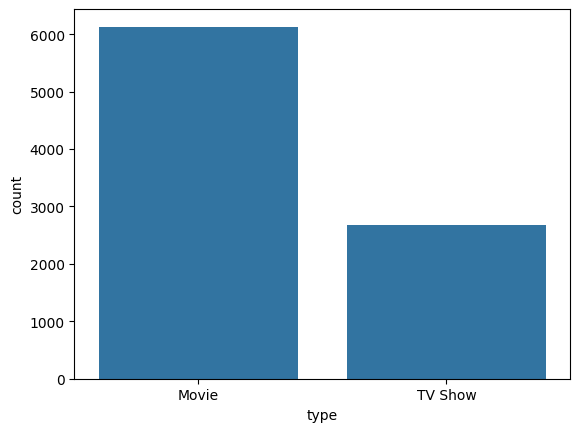

In [ ]:
sns.countplot(x='type', data=df)
plt.show()

Text(0.5, 1.0, '1. Content Type: Movies vs TV Shows')

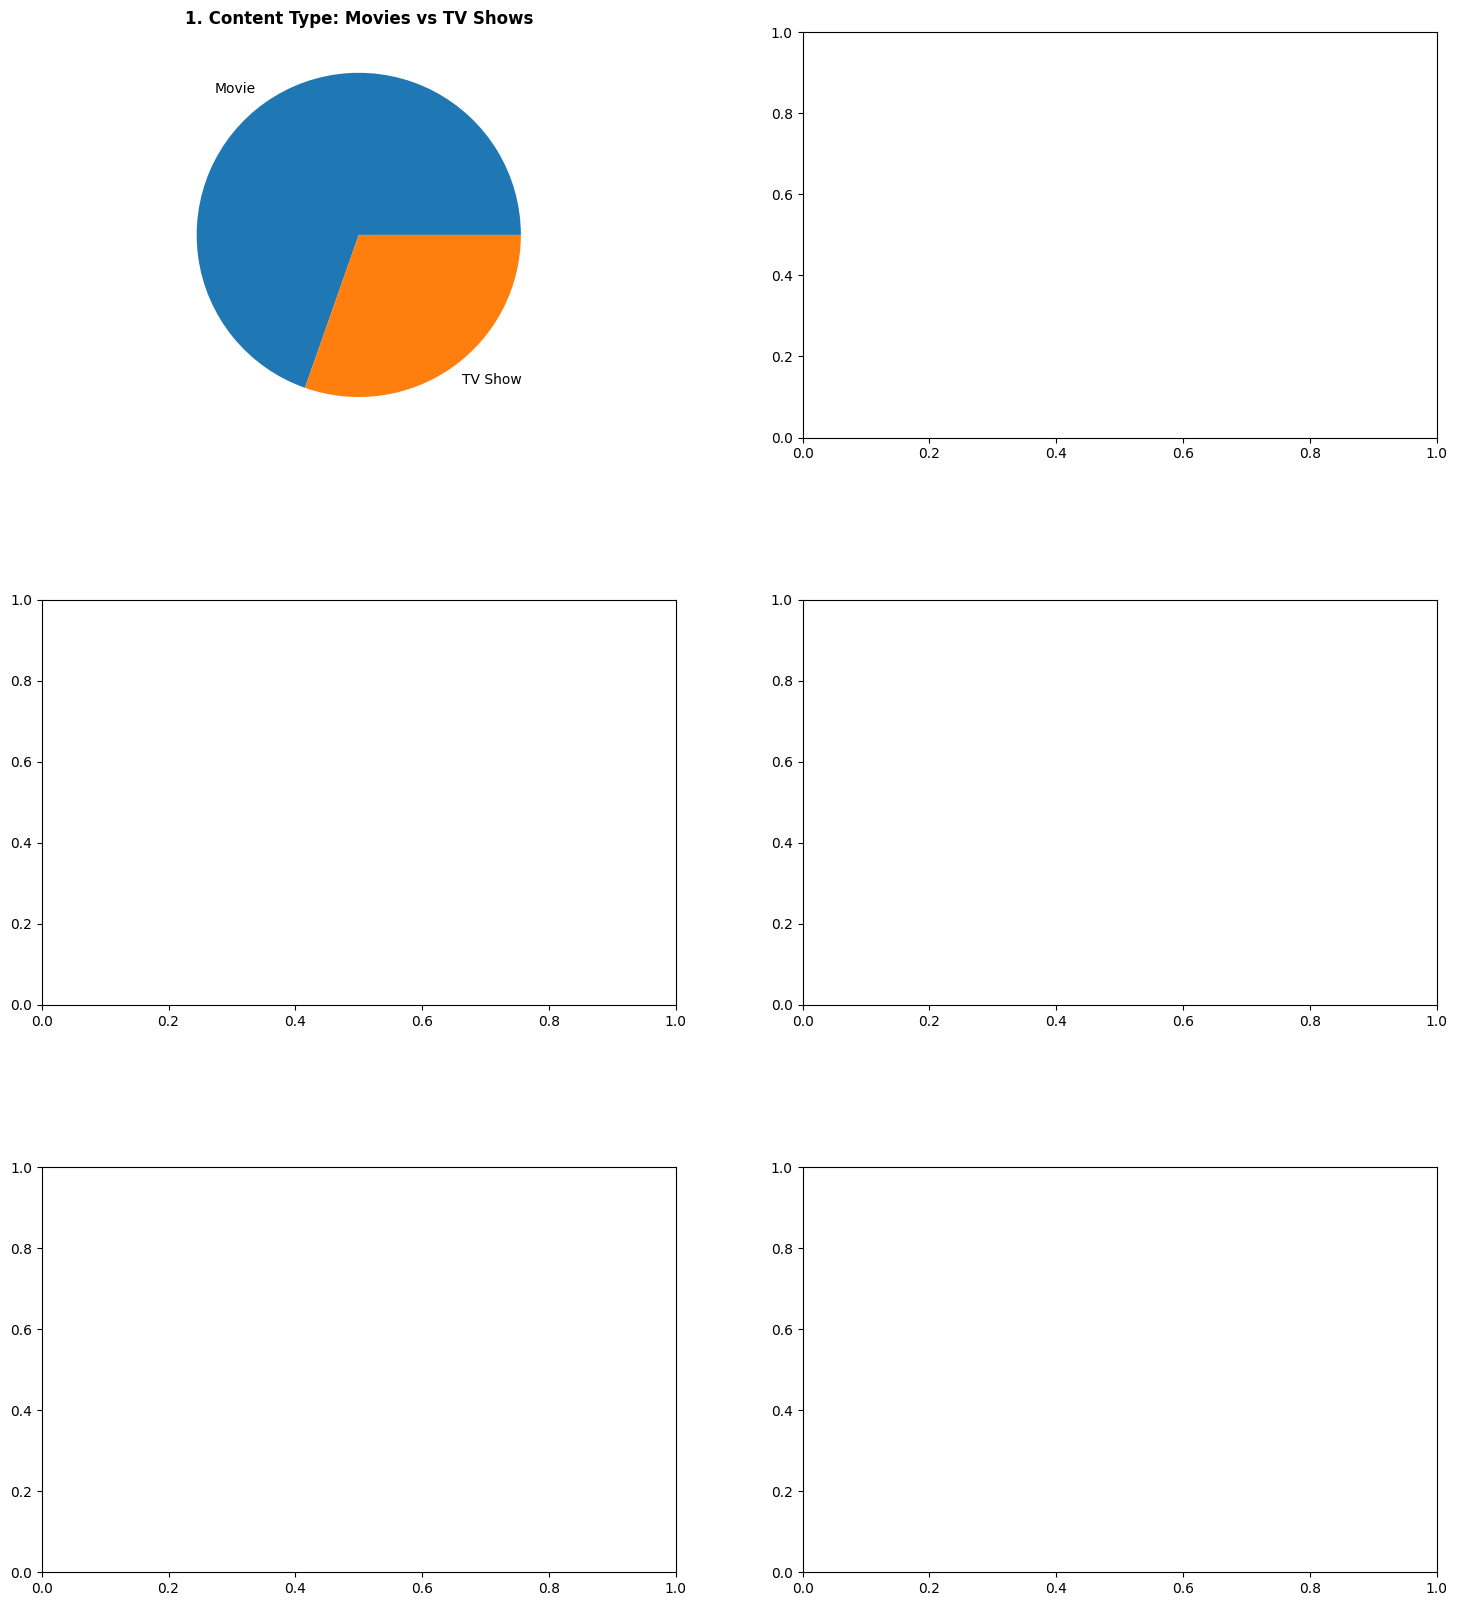

In [ ]:


# Create a 3x2 Dashboard Layout
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.4)
type_counts = df['type'].value_counts()
axes[0, 0].pie(type_counts, labels=type_counts.index)
axes[0, 0].set_title('1. Content Type: Movies vs TV Shows', fontweight='bold')

top 10 country

In [ ]:
country_counts = df['country'].str.split().explode().value_counts().head(10)

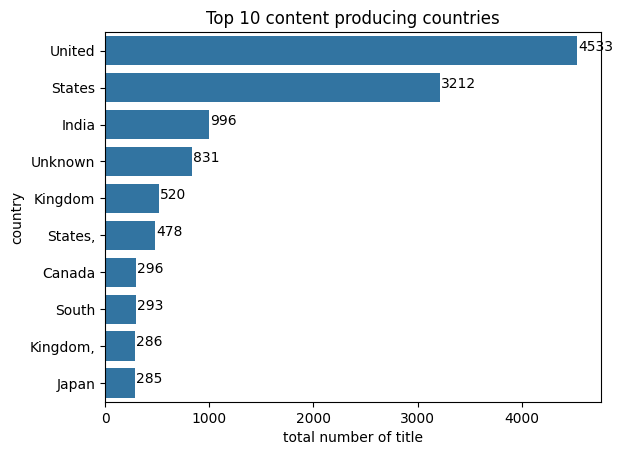

In [ ]:
ax = sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 content producing countries')
plt.xlabel('total number of title')
for i , v in enumerate(country_counts.values):
  ax.text(v+10, i, str(v))
plt.show()

Content Growth Over Time (2010–2026)

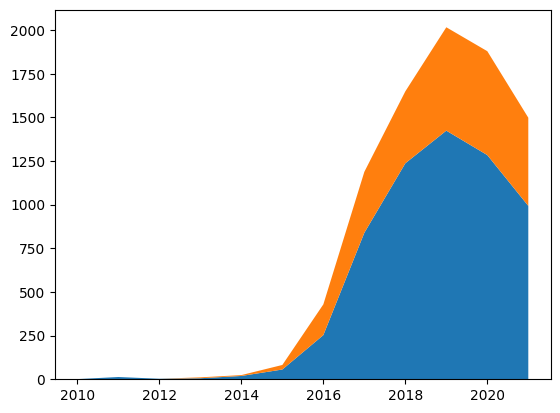

In [ ]:
growth_df = df[(df['year_added']>=2010) & (df['year_added']<=2026)]
growth_data = growth_df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.stackplot(growth_data.index, growth_data['Movie'], growth_data['TV Show'])

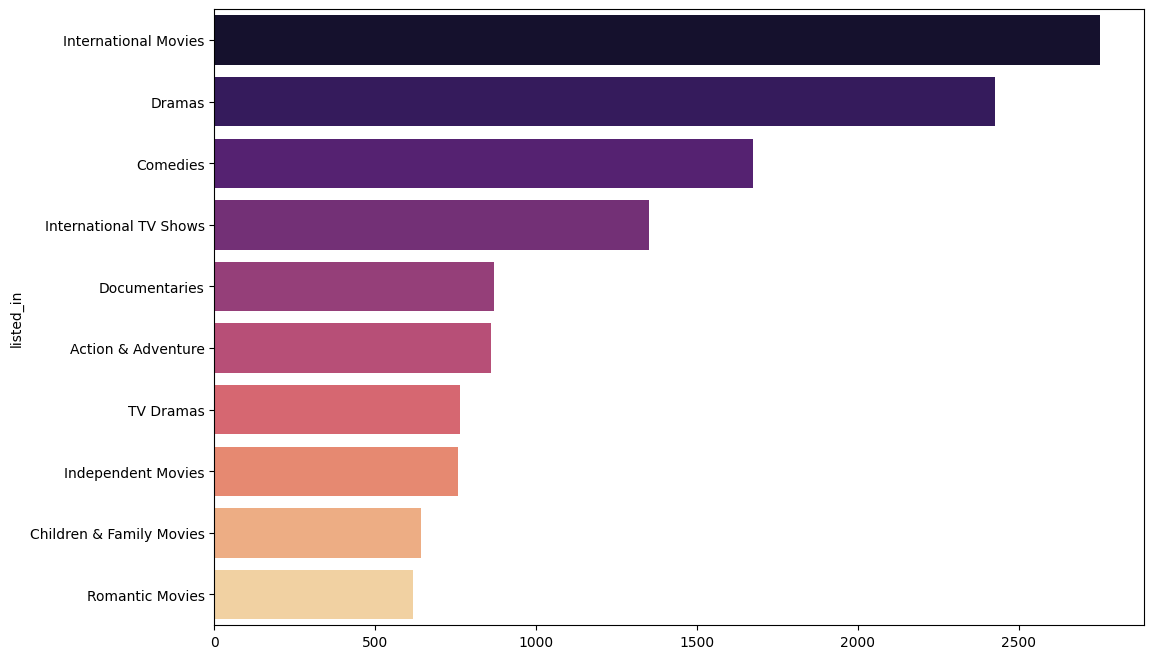

In [ ]:
# 2. Split and Count Genres
# Each title has multiple genres separated by commas; we split them and count each
genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)

# 3. Create Visualization
plt.figure(figsize=(12, 8))
# Using a color palette that highlights the top categories
ax = sns.barplot(x=genres.values, y=genres.index, hue=genres.index, palette='magma', legend=False)

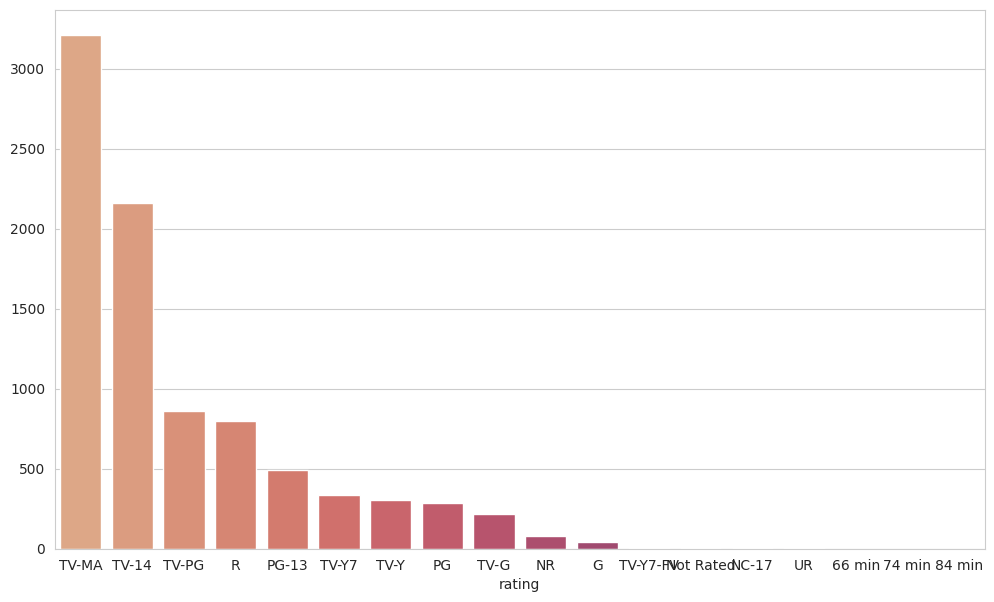

In [ ]:
# 2. Handle missing values
df['rating'] = df['rating'].fillna('Not Rated')

# 3. Get the order of ratings by frequency
rating_counts = df['rating'].value_counts()

# 4. Create the Visualization
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create a barplot using the 'flare' color palette
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='flare', hue=rating_counts.index, legend=False)